# Is Hilary *still* the most poisoned baby name in U.S. history? (2020 update)

One of my all-time favourite statistics blog posts is Hilary Parker's ["Hilary: the most poisoned baby name in US history"](https://hilaryparker.com/2013/01/30/hilary-the-most-poisoned-baby-name-in-us-history/), from the [Not So Standard Deviations blog](https://hilaryparker.com/). I came across it early in my data science career, and was immediately charmed by its curiosity, ingenuity, and statistical rigour.

In the original post, Hilary sought to answer a simple question: Is Hilary/Hillary the most poisoned baby name in U.S. history? Years earlier [another blogger alleged just that](http://stuartbuck.blogspot.com/2003/09/hillary-is-most-poisoned-baby-name-in.html), based on [baby name data made available by the Social Security Administration](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data). But the original blogger's analysis was not the most data-rich or statistically rigorous, and so Hilary Parker decided to dig deeper, offering an even more authoritative analysis showing that yes, Hilary is indeed the most poisoned female baby name in U.S. history, suffering a 70% relative loss in popularity between 1992 and 1993, from which it never recovered.

Now, Hilary Parker's blog post was published in 2013, and some things in the world have, well, *changed* since then. And this led me to wonder: Is Hilary/Hillary *still* the most poisoned baby name in U.S. history? Could the 2016 presidential election perhaps have poisoned *another* name even more?

Beyond these questions, I was also just curious to dive into the data myself and see what insights I could find. So, without further ado, here's my 2020 update of "Hilary: the most poisoned name in US history".

## Imports

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set default figure size and format for retina display
plt.rcParams['figure.figsize']=(8.0, 6.0)
%config InlineBackend.figure_format='retina'

In [2]:
# Read in data
# (CSV file is created from data made by available by SSA; run setup.sh in Github repo to download data and create this file)
df_raw = pd.read_csv('data/babynames.csv', names=['year', 'name', 'sex', 'count'])

In [3]:
# Define year range in dataset
years = df_raw['year'].unique()
year_range = (years[0], years[-1])

## Reproducing Hilary Parker's work

As a first step in my analysis, I thought I'd attempt to recreate Hilary Parker's work, both to confirm her findings and to better understand her approach.

This was made a bit difficult by the fact that Hilary was working from slightly different data than I am. Back in 2013, it seems that the SSA did not make its full baby name dataset available to the public, forcing Hilary to instead scrape the publicly available data from their website. Because of this, **Hilary's data were limited to the 1000 most popular male and female baby names per year**, from 1880 to 2011. **My dataset, in contrast, includes *all* names with a count of 5 or more**, from 1880 to 2019. This is nice, because it provides me a broader pool of data to study. But it also meant that I'd have to do some wrangling to recreate Hilary's work.

I began by recreating her dataset, filtering my data to only female baby names and then creating a new dataset with the top 1000 names from each year.

In [4]:
# Filter data to female babies
df_f = df_raw[df_raw['sex']=='F']

# Initialize empty dataframe
df_f_pop = pd.DataFrame()

# Loop through each year in dataset
for year in years:
    
    # Select data for the year
    df_year = df_f[df_f['year']==year]
    
    # Select 1000 most popular baby names in that year
    df_year_pop = df_year.sort_values('count', ascending=False)[:1000]
    
    # Append these rows to master dataframe
    df_f_pop = df_f_pop.append(df_year_pop, ignore_index=True)

In [5]:
# Preview new dataset
df_f_pop.head()

,year,name,sex,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


Following this I created a pivot table from this dataset, with each year as a row and each name as a column, and with the yearly count of that name as the cell value.

In [6]:
# Create a pivot table listing the count of each name for each year
df_f_pop_pivot = pd.pivot_table(df_f_pop, values='count', index='year', columns='name')

In [7]:
# Preview new pivot table
df_f_pop_pivot.head()

name,Aadhya,Aaliyah,Aanya,Aaron,Abagail,Abbey,Abbie,Abbigail,Abby,Abigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,6.0,12.0,...,NaN,8.0,23.0,NaN,NaN,7.0,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,7.0,8.0,...,NaN,NaN,22.0,NaN,NaN,10.0,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,11.0,14.0,...,6.0,8.0,25.0,NaN,NaN,9.0,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,11.0,...,NaN,NaN,23.0,NaN,NaN,10.0,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,6.0,13.0,...,11.0,13.0,31.0,NaN,NaN,14.0,8.0,58.0,27.0,NaN


Next, following Hilary's methodology, I transformed the yearly count of each name into a percentage, dividing each name's count by the total count of (available) baby names for that year.

In [8]:
# Calculate total count of baby names per year
f_pop_year_totals = df_f_pop_pivot.sum(axis=1)

# Divide name count by total yearly count
df_f_pop_pcts = df_f_pop_pivot.divide(f_pop_year_totals, axis=0)

In [9]:
# Preview dataframe
df_f_pop_pcts.head()

name,Aadhya,Aaliyah,Aanya,Aaron,Abagail,Abbey,Abbie,Abbigail,Abby,Abigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,0.000780,NaN,0.000066,0.000132,...,NaN,0.000088,0.000253,NaN,NaN,0.000077,0.000088,0.000308,0.000297,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,0.000881,NaN,0.000076,0.000087,...,NaN,NaN,0.000239,NaN,NaN,0.000109,0.000098,0.000228,0.000294,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,0.000743,NaN,0.000102,0.000130,...,0.000056,0.000074,0.000232,NaN,NaN,0.000084,0.000158,0.000297,0.000195,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,0.000705,NaN,NaN,0.000098,...,NaN,NaN,0.000205,NaN,NaN,0.000089,0.000098,0.000312,0.000223,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,0.000765,NaN,0.000047,0.000101,...,0.000086,0.000101,0.000242,NaN,NaN,0.000109,0.000062,0.000453,0.000211,NaN


Lastly, I calculate, for each name, the percent change in their percentages since the preceding year. (This is what Hilary Parker refers to as the ["relative risk"](https://en.wikipedia.org/wiki/Relative_risk).)

In [10]:
# Calculate the percent change in each name's yearly percentage since the preceding year 
df_f_pop_pctchg = df_f_pop_pcts.pct_change()

From here we can easily find the "most poisoned" names, by simply finding the minimum value for each year and sorting by those values.

In [11]:
# Find, for each name, greatest loss in percentage and year of that loss 
df_f_pop_pctchg_min_vals = pd.DataFrame(df_f_pop_pctchg.min(), columns=['Loss'])
df_f_pop_pctchg_min_yrs = pd.DataFrame(df_f_pop_pctchg.idxmin(), columns=['Year'])

# Combine values into a single dataframe
df_f_pop_pctchg_min = df_f_pop_pctchg_min_vals.join(df_f_pop_pctchg_min_yrs)

# Clean up dataframe
df_f_pop_pctchg_min.dropna(inplace=True)
df_f_pop_pctchg_min.index.rename('Name', inplace=True)
df_f_pop_pctchg_min['Loss'] = np.round(df_f_pop_pctchg_min['Loss'] * 100, 1)
df_f_pop_pctchg_min['Year'] = df_f_pop_pctchg_min['Year'].astype(int)

# Display top 15 greatest losses
df_f_pop_pctchg_min.sort_values('Loss').head(15)

,Loss,Year
Name,,
Farrah,-78.0,1978
Dewey,-74.4,1899
Catina,-73.4,1974
Khadijah,-72.4,1995
Deneen,-71.8,1965
Hilary,-69.9,1993
Sina,-69.4,1885
Katina,-69.1,1974
Renata,-69.0,1981


And if we compare this to the results that Hilary Parker arrived at in her original blog post... 

![Hilary Parker's results](https://hilaryparker.files.wordpress.com/2013/01/bigdrop.png?w=253&h=300)

We can see that our results nearly exactly match hers! (If you're curious about why Hilary, though occupying the #6 spot in the results table, deserves the top title of most poisoned name, see Hilary's excellent investigation and defence.)

Now that I've reproduced Hilary Parker's original analysis, I can now dig deeper into the data and investigate some questions of my own. In particular:

- Do Hilary's results hold true if we make use of each year's full list of baby names (and not just the 1000 most popular)?
- Do Hilary's results hold true if we include the data from the last 5 years?
- Is relative risk / percent change of the yearly percentage the best way to measure "poisoning"?

## Analyzing the full dataset

### The most poisoned female baby names, by percent change in yearly percentage

To begin, let's see what results we get when we simply include all the data we have. (For now, I will still filter our data to only female baby names.) We follow roughly the same process as above.

In [12]:
# Create a pivot table listing the count of each name for each year
df_f_pivot = pd.pivot_table(df_f, values='count', index='year', columns='name')

# Calculate total count of baby names per year
f_year_totals = df_f_pivot.sum(axis=1)

# Divide name count by total yearly count
df_f_pcts = df_f_pivot.divide(f_year_totals, axis=0)

# Calculate the percent change in each name's yearly percentage since the preceding year 
df_f_pctchg = df_f_pcts.pct_change()

# Unpivot the percent change dataframe
df_f_pctchg_melt = df_f_pctchg.reset_index().melt(id_vars='year', value_name='loss')

In [13]:
# Sorted unpivoted dataframe by lowest losses in percentage
df_f_pctchg_melt.sort_values('loss').head(15)

,year,name,loss
1712890,2010,Chastelyn,-0.944875
1571330,1990,Catherin,-0.932090
3930625,2005,Jenascia,-0.929015
5333006,2006,Levy,-0.923171
2666830,1990,Elizabet,-0.921438
545824,1984,Anaise,-0.913293
1187327,2007,Bethzy,-0.908008
1490641,1941,Cappie,-0.907024
6952341,1961,Perian,-0.905461
8217766,1926,Spicy,-0.905248


This looks very different! Not only are we seeing completely different names, the loss values themselves are substantially lower.

What's going on? Let's take the top name as an example and investigate! As we can see below, the issue seems to be that Chastelyn has only 2 data points in our dataset, and both data points are very low values.

In [14]:
print(f"The Chastelyn column contains {df_f_pivot['Chastelyn'].notna().sum()} non-null values")

The Chastelyn column contains 2 non-null values


In [15]:
print(f"These non-null values occur in the years: {df_f_pivot['Chastelyn'][df_f_pivot['Chastelyn'].notna()].index.tolist()}")

These non-null values occur in the years: [2009, 2010]


In [16]:
# Display name counts for non-null years
df_f_pivot['Chastelyn'].loc[2008:2011]

year
2008      NaN
2009    150.0
2010      8.0
2011      NaN
Name: Chastelyn, dtype: float64

In [17]:
# Display percentages for non-null years
df_f_pcts['Chastelyn'].loc[2008:2011]

year
2008         NaN
2009    0.000082
2010    0.000005
2011         NaN
Name: Chastelyn, dtype: float64

In [18]:
# Display percentage change for non-null years
df_f_pctchg['Chastelyn'].loc[2008:2011]

year
2008         NaN
2009         NaN
2010   -0.944875
2011    0.000000
Name: Chastelyn, dtype: float64

So the math's not wrong: Chastelyn did indeed see a major drop in 2010 from where it was in 2010. But Chastelyn was never a very popular name: It only exceeded the minimum threshold of 5 in 2 years, and in its most popular year, its count was only 150, or 0.008% of all baby names. This is very different from the situation with Hilary, which fell from 1170 to 344 in 1993, a slip from 0.064% to 0.019%.

In [19]:
# Display name counts for Hilary's drop-off years
df_f_pivot['Hilary'].loc[1991:1994]

year
1991    1149.0
1992    1170.0
1993     344.0
1994     145.0
Name: Hilary, dtype: float64

In [20]:
# Display percentages for Hilary's drop-off years
df_f_pcts['Hilary'].loc[1991:1994]

year
1991    0.000613
1992    0.000635
1993    0.000190
1994    0.000081
Name: Hilary, dtype: float64

So it seems that we need a way to filter out cases like Chastelyn (and, presumably, the other names in the above table), where there was a steep decline in the name's popularity, but only because the name wasn't that popular to begin with.

One way to get around this problem would be to ignore names below a certain popularity threshold. We don't need to limit ourselves to the 1000 most popular baby names (as Hilary Parker was forced to), but we could set some suitable threshold and truncate our dataset accordingly. Before jumping to that, however, let's explore another possible method.

### The most poisoned female baby names, by difference in yearly percentage

Another way to get around our problem of unpopular names is to not look at the percent change in percentages at all, but rather the difference between them. This way, unpopular names that become even more unpopular will not show up as high on our poisoned list, because the absolute value of their drop in percentage will be very low. Let's see if this calculation yields any better results.

In [21]:
# Calculate the difference in each name's yearly percentage since the preceding year 
df_f_pctdiff = df_f_pcts.diff()

# Unpivot the percent difference dataframe
df_f_pctdiff_melt = df_f_pctdiff.reset_index().melt(id_vars='year', value_name='loss')

# Sorted unpivoted dataframe by lowest losses in percentage
df_f_pctdiff_melt.sort_values('loss').head(15)

,year,name,loss
8060417,1937,Shirley,-0.008591
8060416,1936,Shirley,-0.006599
5390910,1950,Linda,-0.006248
5390911,1951,Linda,-0.005874
3959025,1985,Jennifer,-0.005242
5390912,1952,Linda,-0.004904
5408710,1970,Lisa,-0.004403
2227337,1957,Deborah,-0.004222
5959243,1883,Mary,-0.004219
5390914,1954,Linda,-0.004057


Different results again! But at least in this case the names look more common. So what's going on here? Let's look at some plots for the top two names on this list, Shirley and Linda.

In [22]:
def plot_name(name):
    '''
    Function to plot the yearly percentage of a baby name over time
    '''
    df_f_pcts[name].plot()
    plt.title(f'Percentage of all new female babies named {name} over time')
    plt.xlabel('Year')
    plt.xlim(year_range)
    plt.ylabel('Percentage')
    plt.show()

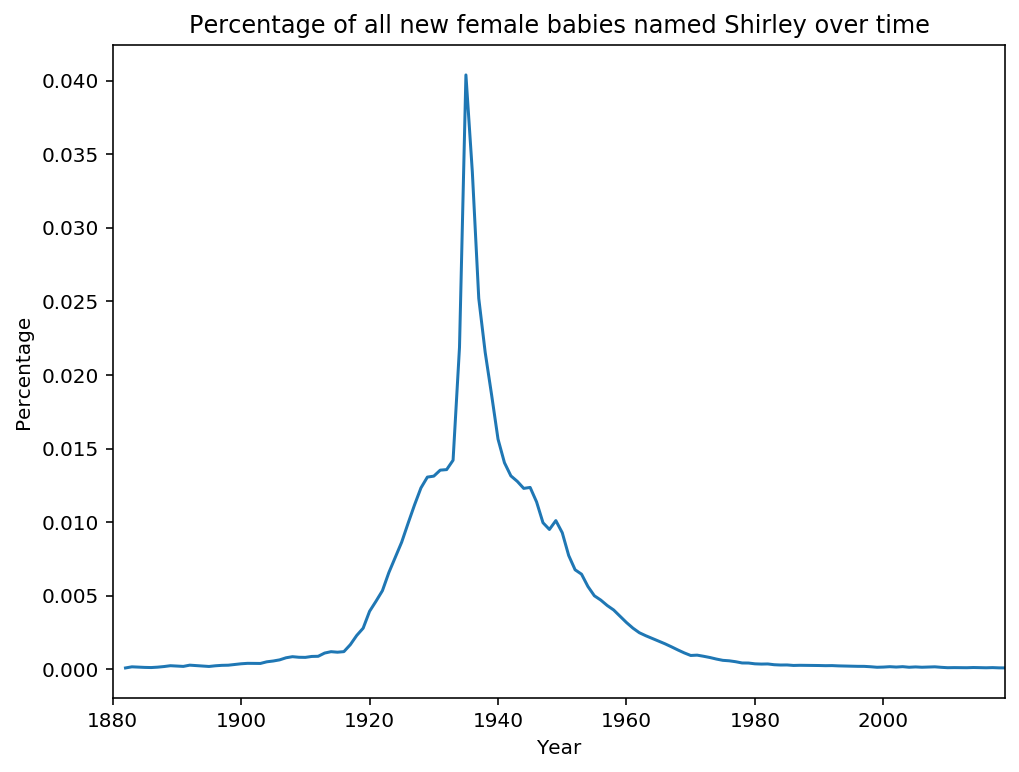

In [23]:
plot_name('Shirley')

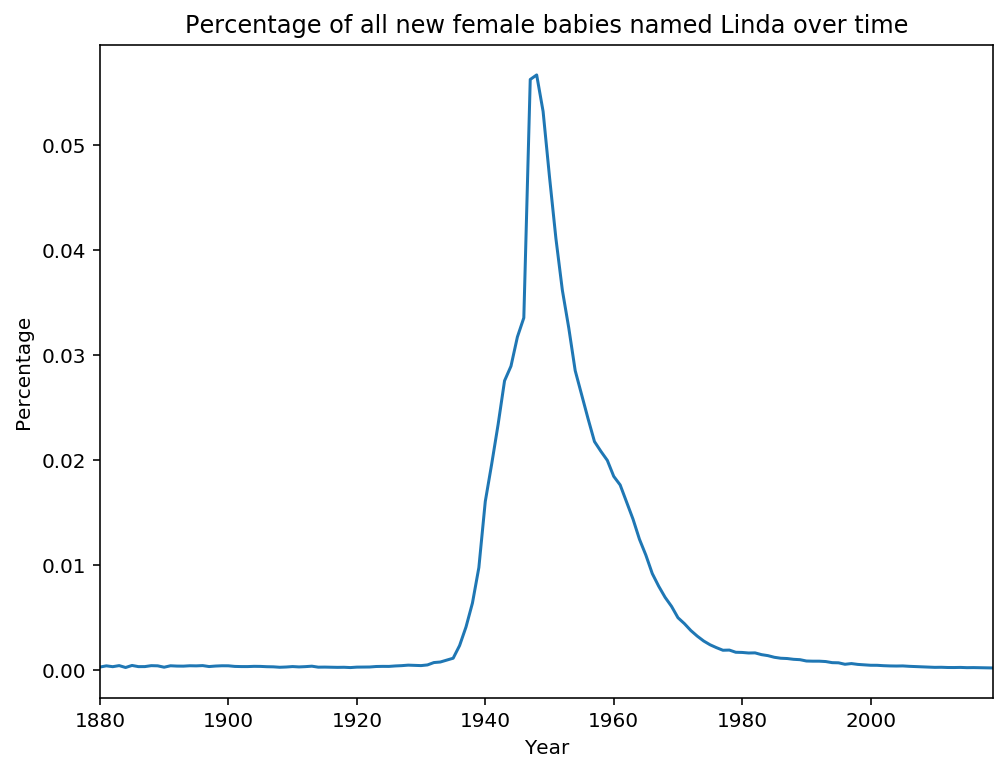

In [24]:
plot_name('Linda')

As we can see here, both of these names saw a big spike followed by a sharp decline. And in fact, both trends have a readily available explanation: Shirley spiked in popularity following [Shirley Temple](https://en.wikipedia.org/wiki/Shirley_Temple)'s rise to stardom in the early 1930s, and Linda spiked in popularity following [Buddy Clark's 1947 hit song "Linda"](https://en.wikipedia.org/wiki/Linda_(1946_song)).

These cases are interesting, to be sure, but the situation here is different from the case of Hilary. Compare the plots above to the plot for Hilary:

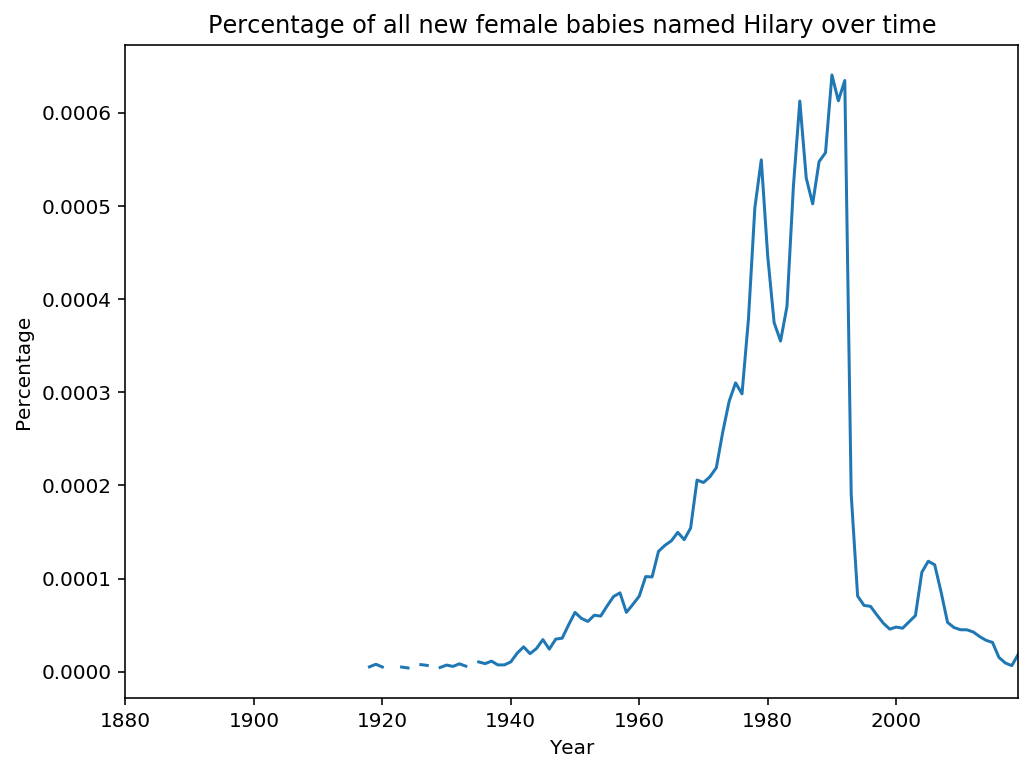

In [25]:
plot_name('Hilary')

This is quite a different pattern. Far from a sudden spike in popularity, Hilary saw a steady increase in popularity for decades before seeing a steep and sudden dropoff in 1993. This is what a poisoned name looks like.

So it seems that looking at the difference between yearly percentage values skews our results in its own way, focusing our attention on names that became widely popular for a short period of time. And while these may be interesting trends to explore, they're not what we're concerned with here.

### The most poisoned (popular) female baby names

Let's, then, go back to our earlier method and look at the percent change in the yearly percentage values. Based on what we saw earlier, we still need a way to filter our data so that our most poisoned names aren't just names that were unpopular to begin with. In an effort to lose as little data as possible, I use the following filtering strategy:

1. Create a dataframe listing, for every name/year pair, that name's count, percentage, percent change in that percentage from the previous year (using data generated from our previous code)
1. Calculate the cumulative sum of each name's percentage for each year, and add this as a new column to our dataframe
1. Filter out any names that fall below the 15th percentile (i.e., names whose cumulative sum value is >= 0.85)\* 
1. Sort the dataframe by the percent change values, in ascending order, so that the names with the greatest loss are listed first

\*The choice of the 15th percentile is somewhat arbitrary, but it both makes intuitive sense and produces reasonable results.

In [26]:
# 1. Create a master dataframe

# Make a copy of the original female baby names dataframe
df_a = df_f.copy()

# Unpivot the percentages dataframe
df_b = df_f_pcts.reset_index().melt(id_vars='year', value_name='percent')

# Add a column for the percent change
df_b['loss'] = df_f_pctchg_melt['loss']

# Change the index of these dataframe to each row's name/year pair
df_a.index = df_a['name'] + '_' + df_a['year'].astype(str)
df_b.index = df_b['name'] + '_' + df_b['year'].astype(str)

# Join the dataframes together
df_f_all = df_a.join(df_b[['percent', 'loss']])

In [27]:
# 2. Add cumulative sum column

# Initialize empty series
cumsum_col = pd.Series(name='cumsum', dtype='float64')

# Loop through each year in dataset
for year in years:

    # Grab data for the selected year
    df_year = df_f_all[df_f_all['year']==year]
    
    # Calculate the cumulative sum of the percentage values for that year
    cumsum_year = df_year['percent'].cumsum()
    
    # Append the series to master list
    cumsum_col = cumsum_col.append(cumsum_year)
    
# Add cumsum column to master dataframe
df_f_all['cumsum'] = cumsum_col

In [28]:
# 3. Filter out names that fall below the 15th percentile
df_f_filtered = df_f_all[(df_f_all['cumsum'] <= 0.85)]

In [29]:
# 4. Sort dataframe by percent change
df_f_filtered.sort_values('loss').head(15)

,year,name,sex,count,percent,loss,cumsum
Farrah_1978,1978,Farrah,F,332,0.000217,-0.780815,0.805098
Dayami_2009,2009,Dayami,F,89,0.000048,-0.766284,0.836940
Citlalli_2002,2002,Citlalli,F,103,0.000057,-0.750076,0.842105
Stephani_1990,1990,Stephani,F,173,0.000091,-0.735843,0.844302
Catina_1974,1974,Catina,F,329,0.000224,-0.735493,0.817571
Khadijah_1995,1995,Khadijah,F,438,0.000249,-0.724605,0.749366
Isis_2015,2015,Isis,F,117,0.000066,-0.707948,0.819474
Hilary_1993,1993,Hilary,F,344,0.000190,-0.700314,0.777293
Allisson_2011,2011,Allisson,F,103,0.000059,-0.697399,0.821881
Katina_1974,1974,Katina,F,765,0.000521,-0.692729,0.746483


Ta-da! Here we've arrived at a result very similar to Hilary Parker's, though not exactly the same. A few new names appear on our list, but nothing radically different than what we saw before.

In [30]:
def plot_names(df_filtered, df_pcts):
    '''
    Function to plot change in yearly percentage for top 15 most poisoned names
    '''
    
    # Sort filtered dataframe by percent change
    df_sorted = df_filtered.sort_values('loss')
    
    # Create list of most poisoned female baby names to plot
    top_names = df_sorted.head(15)['name'].tolist()

    # Set up subplot figure
    plt.figure(figsize=(3*5,5*5))

    # Loop through each name in list
    for i, name in enumerate(top_names):

        # Plot that name's percentage value over time
        plt.subplot(5,3,i+1)
        df_pcts[name].plot()
        plt.scatter(x=df_sorted.iloc[i]['year'], y=df_sorted.iloc[i]['percent'], c='r')
        plt.title(name)
        plt.xlabel('')
        plt.xlim(year_range)

    # Display figure
    plt.tight_layout()
    plt.show()

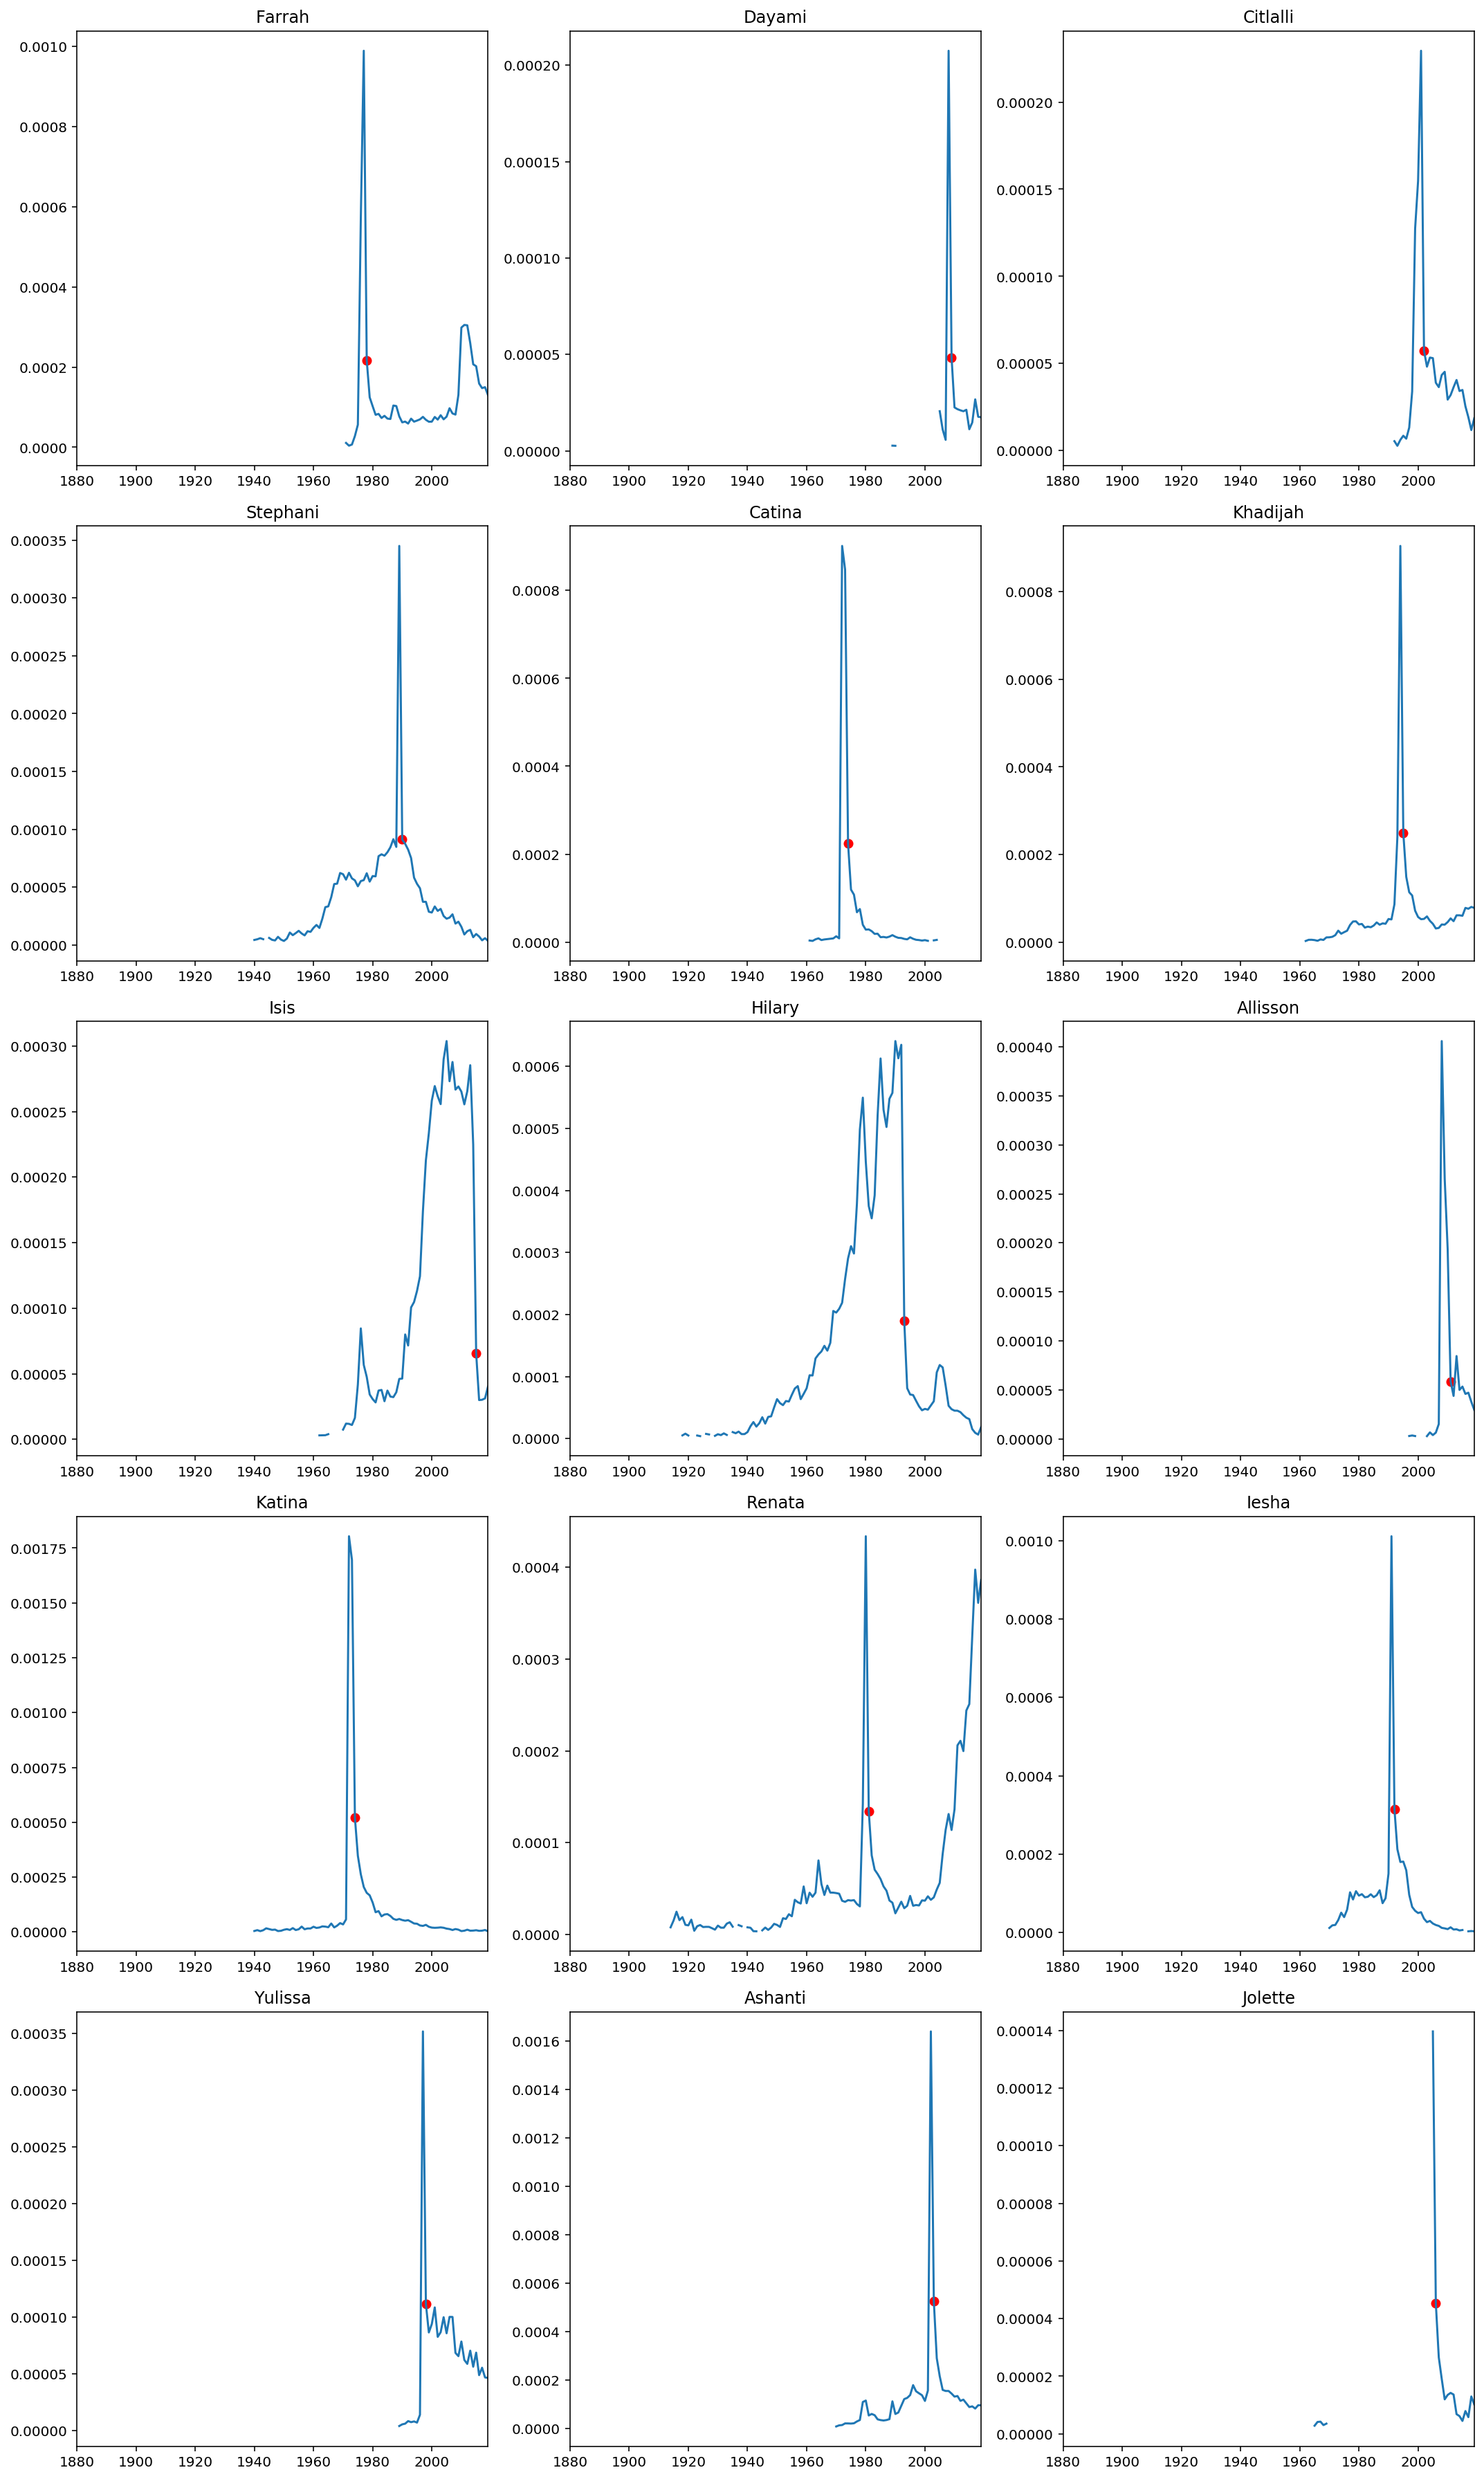

In [31]:
# (Red dot represents the "poisoning year")
plot_names(df_f_filtered, df_f_pcts)

As we can see from these plots, nearly all of our top 15 names are what Hilary Parker deemed "fad names" – names which had a sudden spike in popularity, followed by a similarly steep drop in popularity. As discussed previously, these aren't really cases of "poisoning", and thus can be ignored in our final analysis.

There is, however, one name other than Hilary that is not a fad name but had a steep decline, and that's Isis. In fact, **Isis suffered a slightly worse poisoning than Hilary, dropping by 70.8% in a single year, compared to Hilary's 70.0% drop**. The reasons for this are pretty obvious: Isis's drop occurred in 2015, right after the terrorist group of the same name came into wider cultural prominence.

### Controlling for fad names

Before proceeding further, I was curious: Is there a way to filter out these "fad names" automatically, so that we can only see the truly most poisoned names? After a bit of thinking, I came up with the following method: Take the "poisoning year" of a fad name, the year in which it experiences its sudden drop in popularity (following its sudden increase in popularity). Now consider the name's popularity a few years before the poisoning year, say 5 years earlier. In most cases, there will not be much of a difference between these two popularities (since it was just a fad name); if anything, the name will still be more popular after the fad spike than it was five years previous.

Truly poisoned names, in contrast, will see a steep drop in popularity in their poisoning over both the 1-year and the 5-year period, since they were steadily popular before they were poisoned. Therefore, by calculating the 5-year percent change for each name and filtering out names whose 5-year percent change is not sufficiently negative, we may be able to automatically filter out fad names. (I set my 5-year percent change threshold to -0.5, i.e., truly poisoned names need to have at least a 50% decrease in popularity in their poisoning year from where they were 5 years prior.)

Let's add in these data points and see how our results improve.

In [32]:
# Calculate the 5-year percent change in yearly percentage
df_f_pctchg_5 = df_f_pcts.pct_change(periods=5)

# Unpivot the 5-year percent change dataframe
df_c = df_f_pctchg_5.reset_index().melt(id_vars='year', value_name='lag_loss')

# Change the index of these dataframe to each row's name/year pair
df_c.index = df_c['name'] + '_' + df_c['year'].astype(str)

# Join this new column to the master dataframe
df_f_all = df_f_all.join(df_c['lag_loss'])

In [33]:
# Filter out names that fall below the 10th percentile & whose 5-year percent change is > -0.5
df_f_filtered = df_f_all[(df_f_all['cumsum'] <= 0.85) & (df_f_all['lag_loss'] < -0.5)]

In [34]:
# Sort dataframe by percent change
df_f_filtered.sort_values('loss').head(15)

,year,name,sex,count,percent,loss,cumsum,lag_loss
Isis_2015,2015,Isis,F,117,0.000066,-0.707948,0.819474,-0.752410
Hilary_1993,1993,Hilary,F,344,0.000190,-0.700314,0.777293,-0.652693
Hillary_1994,1994,Hillary,F,408,0.000229,-0.611530,0.757454,-0.671926
Hilary_1994,1994,Hilary,F,145,0.000081,-0.572980,0.842414,-0.854228
Miley_2014,2014,Miley,F,355,0.000199,-0.564579,0.707376,-0.789293
Mylee_2014,2014,Mylee,F,103,0.000058,-0.558109,0.829455,-0.676807
Caitlin_2016,2016,Caitlin,F,218,0.000123,-0.539404,0.762500,-0.730164
Kaitlin_2016,2016,Kaitlin,F,81,0.000046,-0.538795,0.849457,-0.764594
Caitlyn_2016,2016,Caitlyn,F,248,0.000140,-0.493024,0.749163,-0.734665
Shanice_2000,2000,Shanice,F,174,0.000096,-0.449935,0.808408,-0.649646


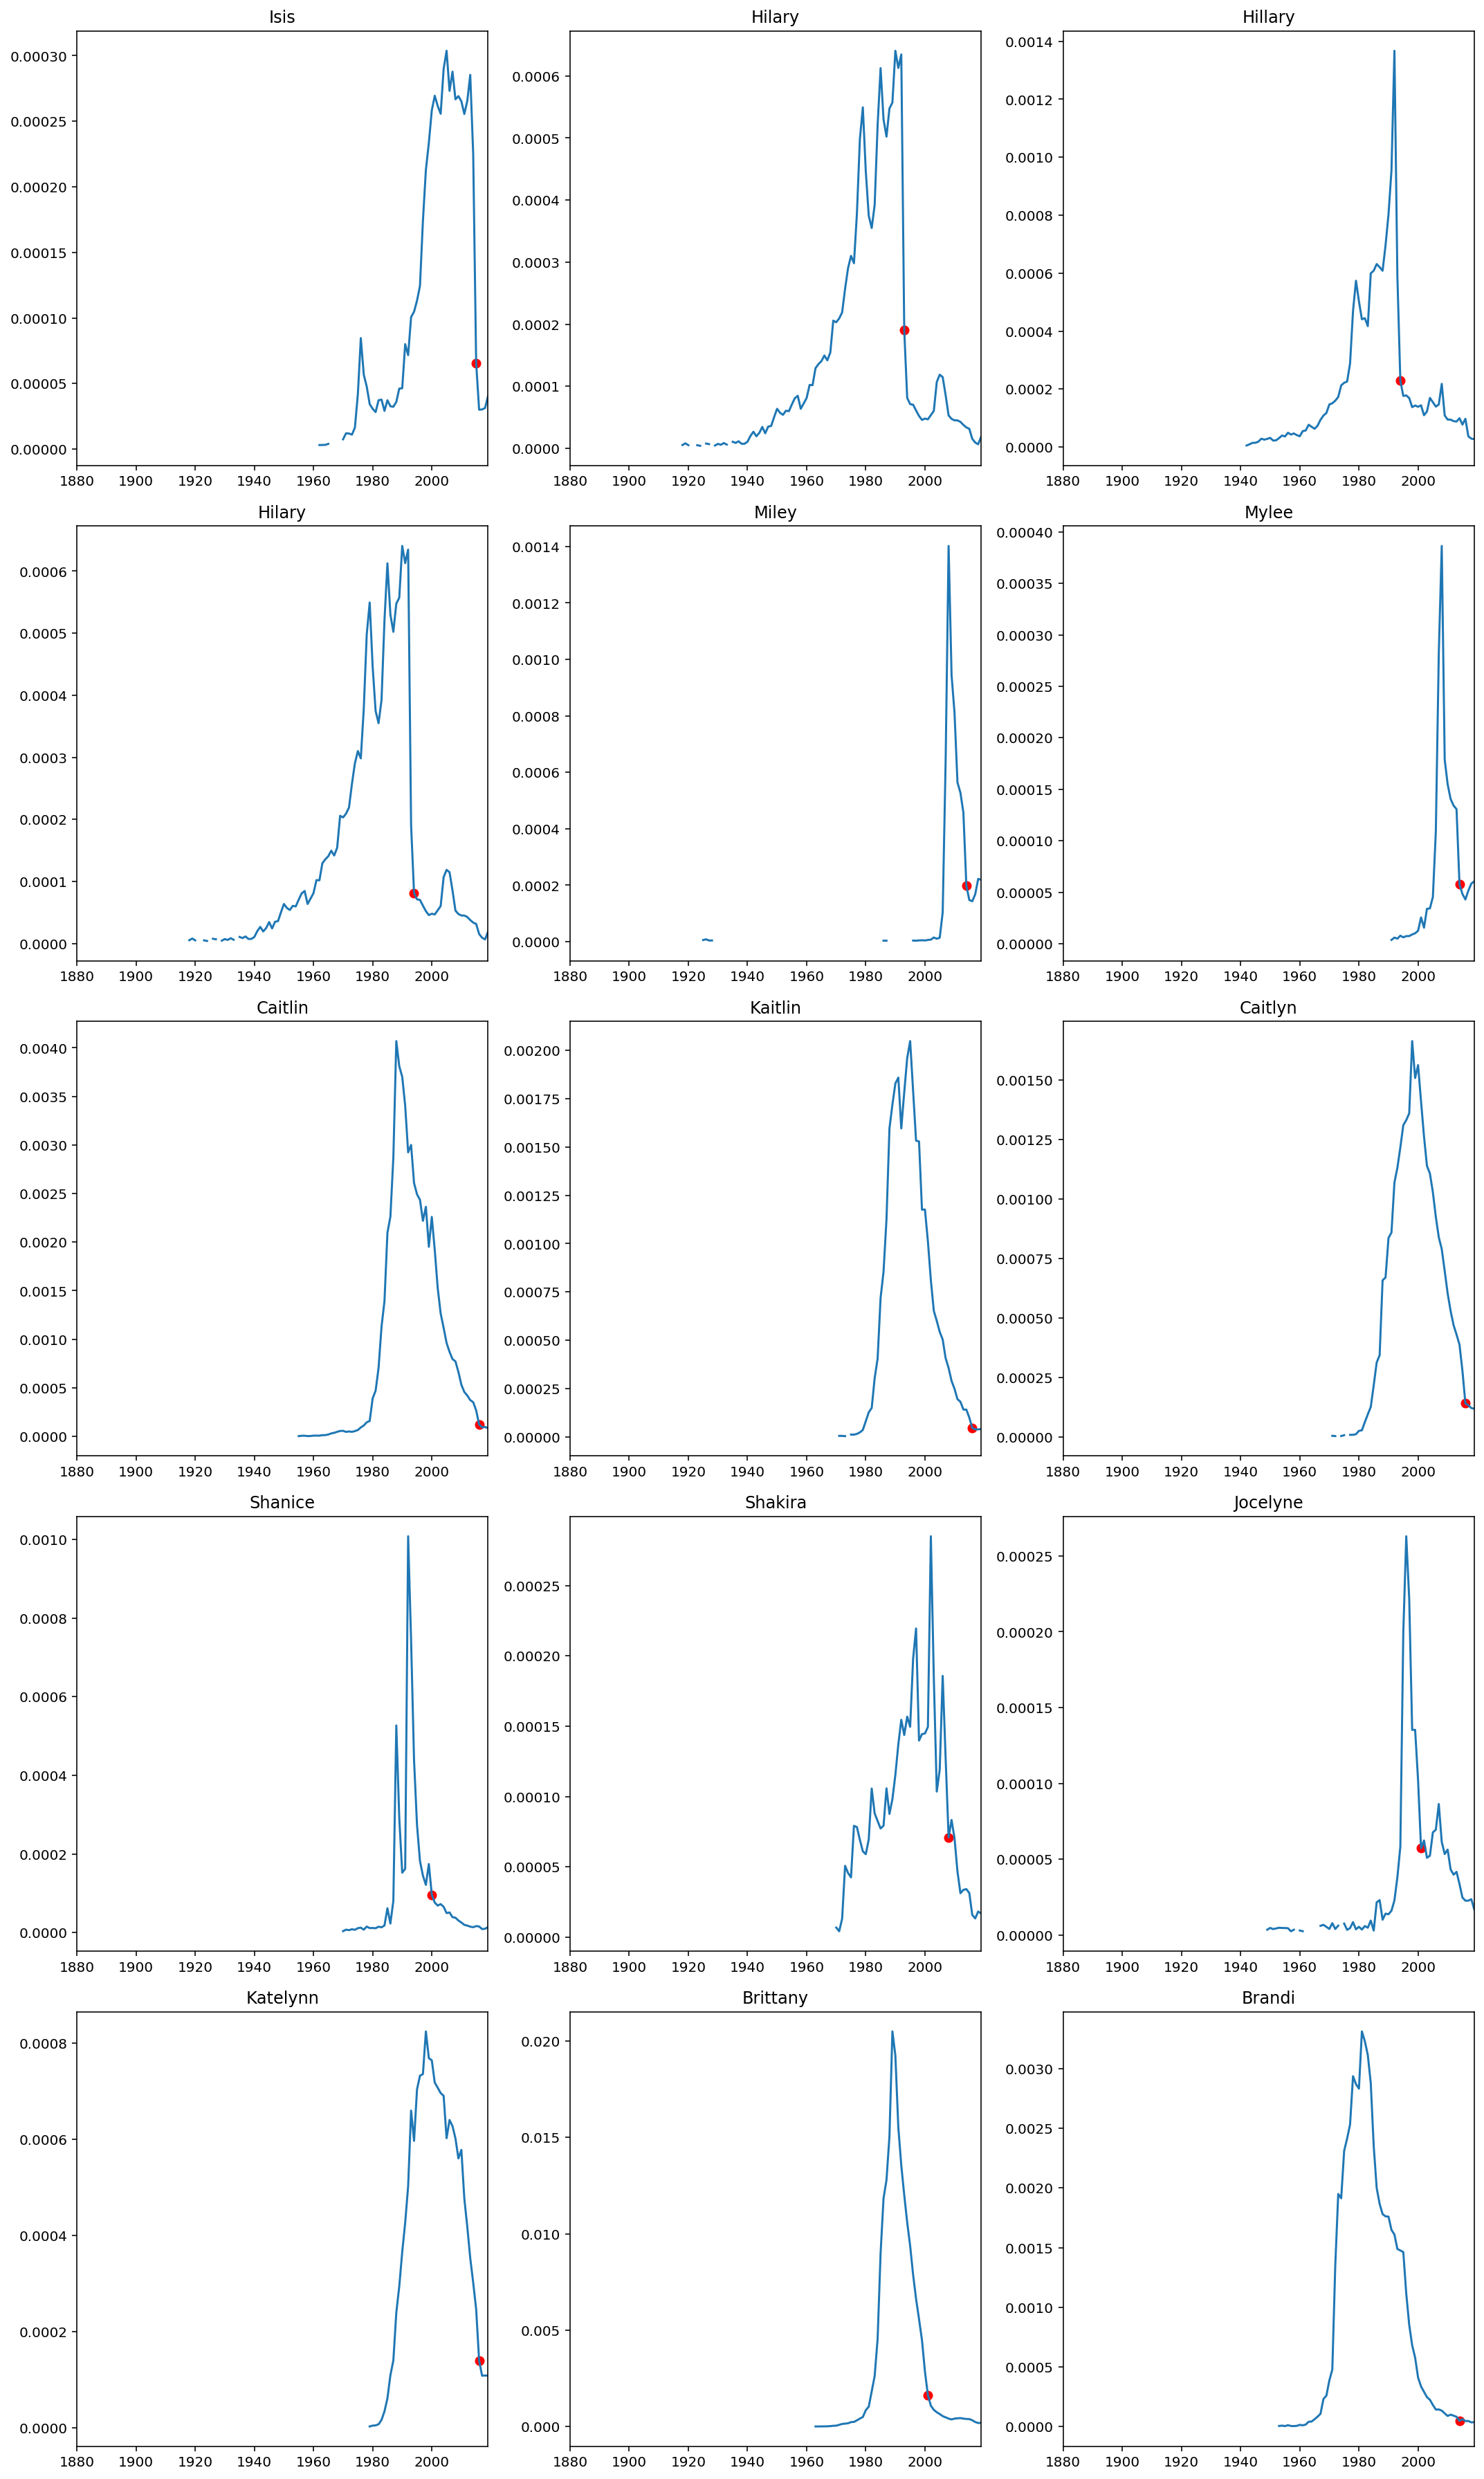

In [35]:
plot_names(df_f_filtered, df_f_pcts)

These results are much cleaner! Although there are still a few fad names in our final list (e.g., Miley, Shanice), the majority are names that legitimately fell from grace. And while there are certainly some names that experienced sharp drops in popularity (like all varieties of Caitlin), none of these names saw anywhere near the poisoning of Hilary and Isis.

### The most poisoned baby names, regardless of birth sex

These are interesting results, but we're not done yet. Thus far, we've only been working with the dataset of female baby names, following in Hilary Parker's footsteps. But this isn't what we should be doing if we want to definitively discover the most poisoned baby name in U.S. history. First, we should be looking at the numbers for both female and male babies. Second, we shouldn't be distinguishing between male and female baby names at all. If a name is poisoned, it should be poisoned for both sexes. (This is especially relevant since Hilary is used as a name for both men and women.)

So let's now apply our previous methodology to the fullest version of our data.

In [36]:
# Create a dataframe listing yearly count of all unique names, regardless of birth sex
df_all = df_raw.groupby(['year', 'name'])['count'].sum()
df_all = df_all.reset_index()

In [37]:
# Sort new dataframe so that each year's names are listed in descending order of their counts

# Initialize empty dataframe
df_count = pd.DataFrame()

# Loop through each year in dataset
for year in years:
    
    # Grab data for the selected year
    df_year = df_all[df_all['year']==year]
    
    # Sort data by count in descending order
    df_year = df_year.sort_values('count', ascending=False)
    
    # Add sorted data to master dataframe
    df_count = df_count.append(df_year, ignore_index=True)

In [38]:
# Create a pivot table listing the count of each name for each year
df_pivot = pd.pivot_table(df_count, values='count', index='year', columns='name')

# Calculate total count of baby names per year
year_totals = df_pivot.sum(axis=1)

# Divide name count by total yearly count
df_pcts = df_pivot.divide(year_totals, axis=0)

# Calculate the percent change in each name's yearly percentage since the preceding year 
df_pctchg = df_pcts.pct_change()

# Unpivot the percent change dataframe
df_pctchg_melt = df_pctchg.reset_index().melt(id_vars='year', value_name='loss')

# Calculate the 5-year percent change in yearly percentage
df_pctchg_5 = df_pcts.pct_change(periods=5)

# Unpivot the 5-year percent change dataframe
df_pctchg_5_melt = df_pctchg_5.reset_index().melt(id_vars='year', value_name='lag_loss')

In [39]:
# 1. Create a master dataframe

# Make a copy of the original female baby names dataframe
df_a = df_count.copy()

# Unpivot the percentages dataframe
df_b = df_pcts.reset_index().melt(id_vars='year', value_name='percent')

# Add columns for the 1-year and 5-year percent change
df_b['loss'] = df_pctchg_melt['loss']
df_b['lag_loss'] = df_pctchg_5_melt['lag_loss']

# Change the index of these dataframe to each row's name/year pair
df_a.index = df_a['name'] + '_' + df_a['year'].astype(str)
df_b.index = df_b['name'] + '_' + df_b['year'].astype(str)

# Join the dataframes together
df = df_a.join(df_b[['percent', 'loss', 'lag_loss']])

In [40]:
# 2. Add cumulative sum column

# Initialize empty series
cumsum_col = pd.Series(name='cumsum', dtype='float64')

# Loop through each year in dataset
for year in years:

    # Grab data for the selected year
    df_year = df[df['year']==year]
    
    # Calculate the cumulative sum of the percentage values for that year
    cumsum_year = df_year['percent'].cumsum()
    
    # Append the series to master list
    cumsum_col = cumsum_col.append(cumsum_year)
    
# Add cumsum column to master dataframe
df['cumsum'] = cumsum_col

In [41]:
# 3. Filter out names that fall below the 14th percentile
df_filtered = df[(df['cumsum'] <= 0.86) & (df['lag_loss'] < -0.5)]

In [42]:
# 4. Sort dataframe by percent change
df_filtered.sort_values('loss').head(15)

,year,name,count,percent,loss,lag_loss,cumsum
Isis_2015,2015,Isis,117,0.000032,-0.707721,-0.751720,0.859174
Hilary_1993,1993,Hilary,350,0.000093,-0.696781,-0.650003,0.834333
Grover_1894,1894,Grover,118,0.000348,-0.607929,-0.520623,0.857554
Hillary_1994,1994,Hillary,415,0.000112,-0.607028,-0.669354,0.816457
Woodrow_1920,1920,Woodrow,779,0.000344,-0.601463,-0.680404,0.822841
Miley_2014,2014,Miley,355,0.000096,-0.564004,-0.788841,0.767182
Grover_1889,1889,Grover,210,0.000727,-0.540821,-0.781283,0.794377
Caitlin_2016,2016,Caitlin,218,0.000060,-0.538806,-0.729037,0.809911
Caitlyn_2016,2016,Caitlyn,248,0.000068,-0.492367,-0.733557,0.798673
Shanice_2000,2000,Shanice,174,0.000046,-0.449667,-0.649480,0.852470


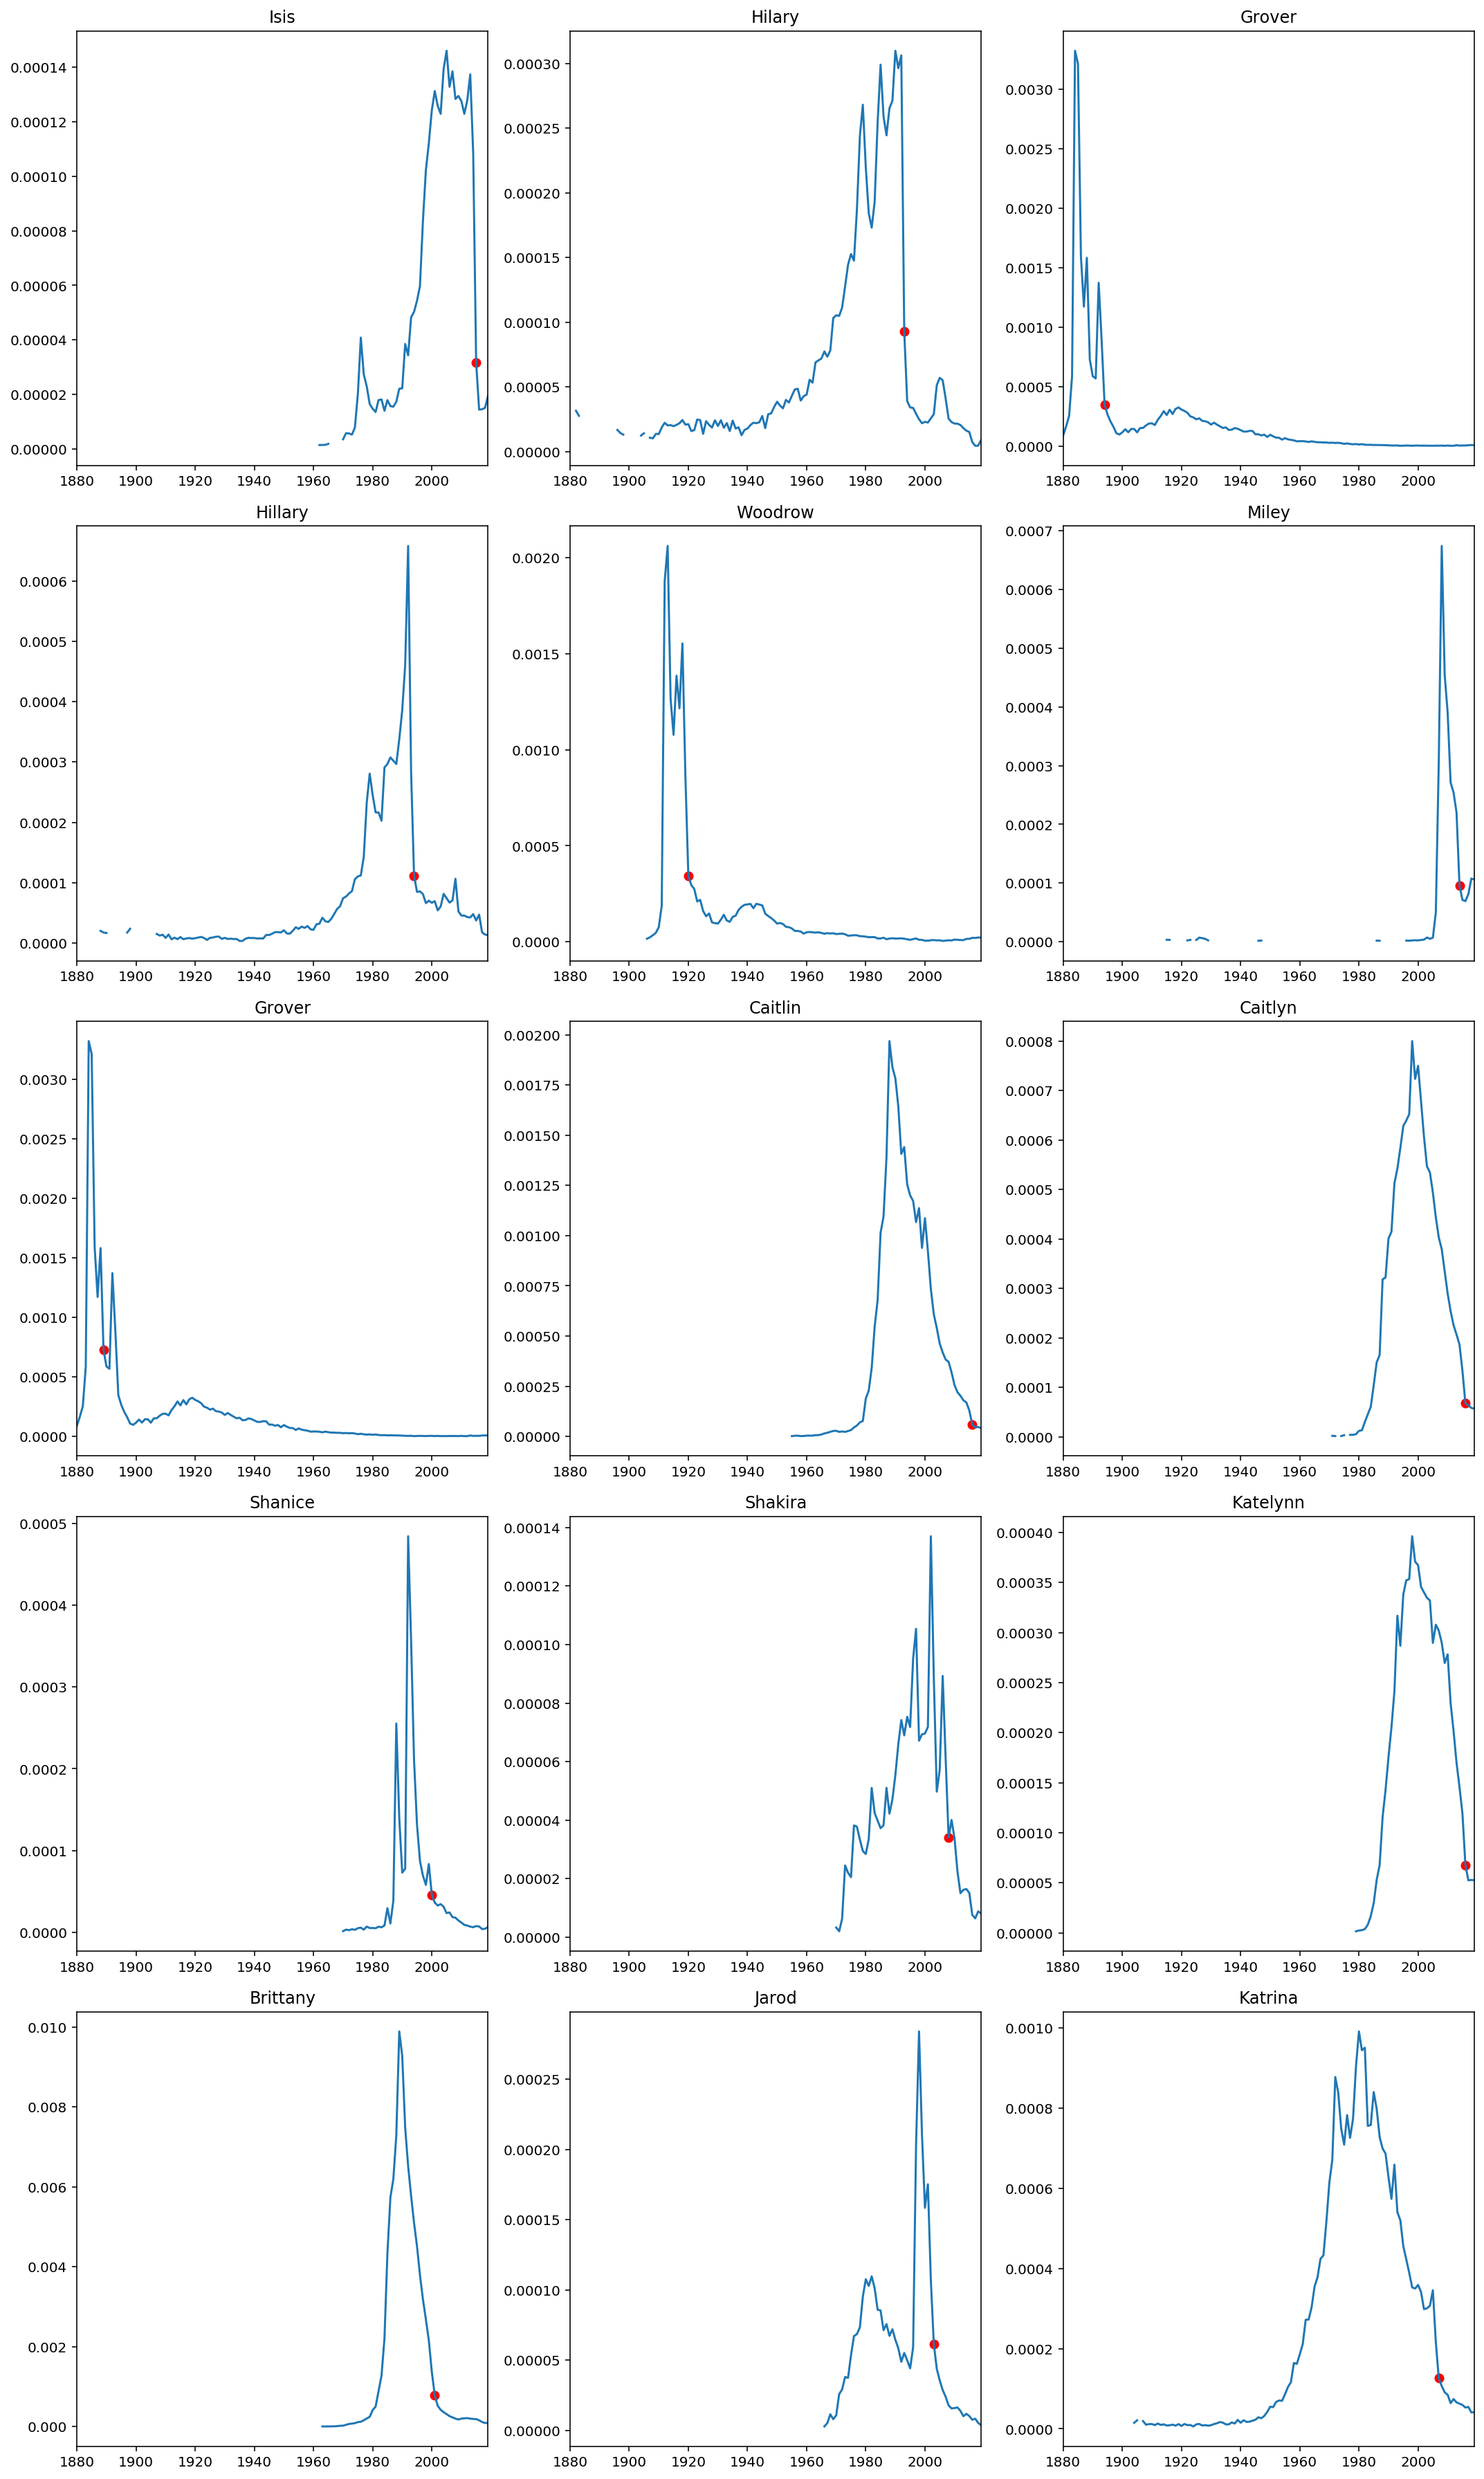

In [43]:
plot_names(df_filtered, df_pcts)

As we can see, working with the full dataset doesn't change much. Though a few men's names do appear in the top 15 – notably, the first names of U.S. presidents, which waned and waxed in popularity with their respective presidencies – the overall results are still the same: Isis and Hilary/Hillary are without a doubt the most poisoned baby names in U.S. history.

## Conclusion

What does this tell us? First, it shows that Hilary Parker's original blog post was completely spot on, even though she was working with a smaller dataset and did not run her analysis on all baby names regardless of sex: **Up until 2013, Hilary/Hillary was indeed the most poisoned baby name in U.S. history.**

However,  our 2020 update has revealed a new even more poisoned name, which occurred in the years since Hilary Parker's original analysis: **To date (October 2020), Isis is the most poisoned baby name in U.S. history**, barely edging out Hilary/Hillary for the top spot.

That being said, Hilary/Hillary, at its height, was a much more popular name than Isis ever was, accounting together for nearly 0.1% of all baby names in 1992. Thus its poisoning is all the more impressive and severe.

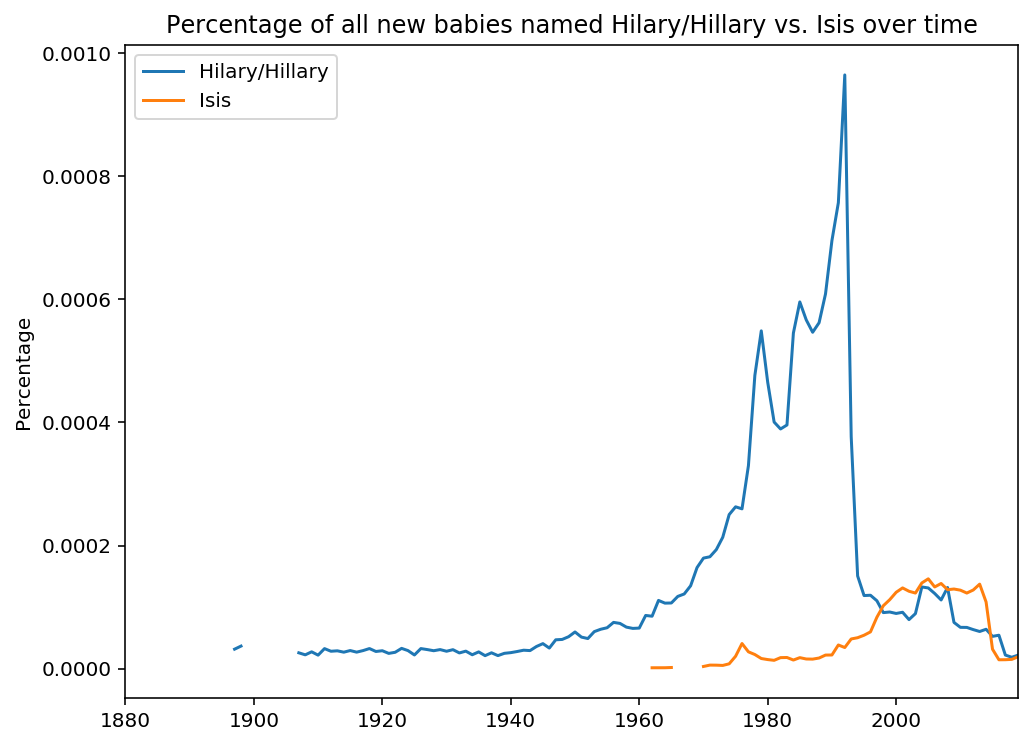

In [44]:
plt.figure()
plt.plot((df_pcts['Hilary'] + df_pcts['Hillary']), label='Hilary/Hillary')
plt.plot(df_pcts['Isis'], label='Isis')
plt.title('Percentage of all new babies named Hilary/Hillary vs. Isis over time')
plt.xlabel('')
plt.xlim(year_range)
plt.ylabel('Percentage')
plt.legend()
plt.show()

Whether this means Hilary/Hillary is actually more deserving of the top title, I'll leave to the judgment of the reader. Regardless, we can confidently conclude that American parents seem to hate two things, and they hate them nearly equally: terrorists and powerful women.